In [1]:
import pandas as pd
from tensorflow import keras as krs
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = krs.datasets.cifar10.load_data()

In [3]:
#shape of train and test sets of images
train_images.shape,test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
#shape of train and test sets of labels
train_labels.shape,test_labels.shape

((50000, 1), (10000, 1))

In [5]:
#sample
train_images[888]

array([[[163, 127, 111],
        [166, 130, 114],
        [171, 135, 119],
        ...,
        [193, 154, 138],
        [186, 147, 132],
        [178, 142, 127]],

       [[184, 147, 131],
        [186, 150, 134],
        [190, 154, 138],
        ...,
        [198, 161, 143],
        [193, 155, 138],
        [188, 151, 134]],

       [[186, 149, 133],
        [182, 147, 131],
        [189, 153, 137],
        ...,
        [205, 170, 150],
        [200, 164, 143],
        [196, 161, 141]],

       ...,

       [[109, 110, 123],
        [111, 113, 126],
        [115, 117, 130],
        ...,
        [123, 121, 129],
        [119, 118, 126],
        [113, 118, 124]],

       [[107, 110, 121],
        [110, 113, 124],
        [113, 116, 127],
        ...,
        [121, 119, 127],
        [116, 116, 124],
        [110, 114, 120]],

       [[103, 108, 116],
        [107, 113, 120],
        [110, 116, 123],
        ...,
        [114, 113, 121],
        [111, 112, 120],
        [106, 111, 117]]

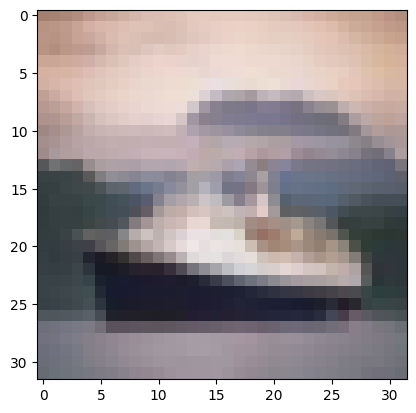

In [6]:
plt.imshow(train_images[888])

In [7]:
train_labels[888]

array([8], dtype=uint8)

In [8]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
#unique values in labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
scaled_train_x,scaled_test_x=train_images/255,test_images/255

In [11]:
# sequential model
model=krs.models.Sequential()

In [12]:
#layers
model.add(krs.layers.Conv2D(30,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(krs.layers.MaxPooling2D((2,2)))
model.add(krs.layers.Conv2D(60,(3,3),activation='relu'))
model.add(krs.layers.MaxPooling2D((2,2)))
model.add(krs.layers.Conv2D(90,(3,3),activation='relu'))
model.add(krs.layers.MaxPooling2D((2,2)))
model.add(krs.layers.Flatten())
model.add(krs.layers.Dense(60,activation='relu'))
model.add(krs.layers.Dense(10,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(scaled_train_x,train_labels,validation_data=(scaled_test_x,test_labels),epochs=25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3418 - loss: 1.7718 - val_accuracy: 0.5441 - val_loss: 1.2767
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5697 - loss: 1.2051 - val_accuracy: 0.6100 - val_loss: 1.1077
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6401 - loss: 1.0320 - val_accuracy: 0.6511 - val_loss: 1.0039
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6771 - loss: 0.9213 - val_accuracy: 0.6674 - val_loss: 0.9649
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7061 - loss: 0.8414 - val_accuracy: 0.6839 - val_loss: 0.9197
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7242 - loss: 0.7839 - val_accuracy: 0.6804 - val_loss: 0.9343
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7496 - loss: 0.7156 - val_accuracy: 0.6983 - val_loss: 0.8851
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7630 - 

Text(0, 0.5, 'accuracy score')

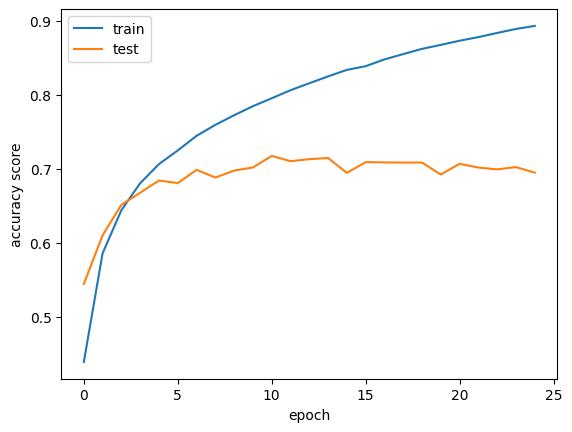

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.xlabel("epoch")
plt.ylabel("accuracy score")

In [26]:
#model evaluation
loss,accuracy=model.evaluate(scaled_test_x,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6970 - loss: 1.2700


In [27]:
loss

1.275294303894043

In [28]:
accuracy

0.6945000290870667

In [47]:
pred=model.predict(scaled_test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [54]:
pred[646]

array([5.9007630e-07, 5.1419573e-07, 1.3786679e-04, 3.8939096e-02,
       9.5001495e-01, 9.1368752e-03, 1.3595740e-03, 1.5630972e-04,
       2.5386040e-04, 3.9906377e-07], dtype=float32)

In [55]:
np.argmax(pred[646])


4

In [56]:
test_labels[646]

array([3], dtype=uint8)